In [1]:
from PIL import Image
import pandas as pd 
import os
import numpy as np 
import random
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid import ImageGrid
from sklearn.model_selection import train_test_split
# local module import
from preprocessing import load_dataset

In [2]:
# Path to all data
DATA_PATH = "../dataset_mri/lgg-mri-segmentation/kaggle_3m/"
IMG_SIZE=224
dataset=load_dataset(DATA_PATH)
dataset.head()

,patient_id,image_path,image_data,mask_path,mask_data,tumor
0,TCGA_CS_4941_19960909_1,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
1,TCGA_CS_4941_19960909_10,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[2, 3, 3, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 3, 4,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",0
2,TCGA_CS_4941_19960909_11,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[1, 1, 2, 2, 3, 2, 4, 3, 3, 3, 2, 2, 2, 3, 5,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
3,TCGA_CS_4941_19960909_12,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[4, 2, 2, 4, 3, 2, 2, 2, 3, 4, 4, 3, 2, 2, 3,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1
4,TCGA_CS_4941_19960909_13,../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[3, 1, 2, 3, 2, 3, 4, 5, 6, 5, 3, 2, 2, 2, 4,...",../dataset_mri/lgg-mri-segmentation/kaggle_3m/...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1


In [3]:
dataset.columns

Index(['patient_id', 'image_path', 'image_data', 'mask_path', 'mask_data',
       'tumor'],
      dtype='object')

Visualisation of tumor presence frequency


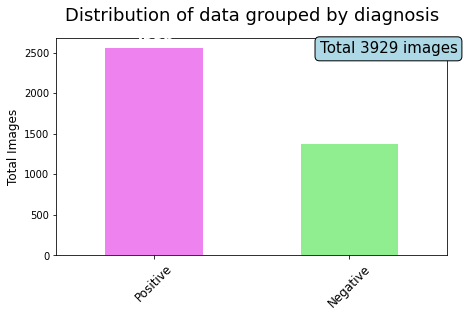

In [4]:
# Plot
ax = dataset.tumor.value_counts().plot(kind='bar',
                                      stacked=True,
                                      figsize=(7, 4),
                                     color=["violet", "lightgreen"])


ax.set_xticklabels(["Positive", "Negative"], rotation=45, fontsize=12);
ax.set_ylabel('Total Images', fontsize = 12)
ax.set_title("Distribution of data grouped by diagnosis",fontsize = 18, y=1.05)

# Annotate
for i, rows in enumerate(dataset.tumor.value_counts().values):
    ax.annotate(int(rows), xy=(i, rows-12), 
                rotation=0, color="white", 
                ha="center", verticalalignment='bottom', 
                fontsize=15, fontweight="bold")
    
ax.text(1.2, 2550, f"Total {len(dataset)} images", size=15,
        color="black",
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   fc=("lightblue"),
                   ec=("black"),
                   )
         );



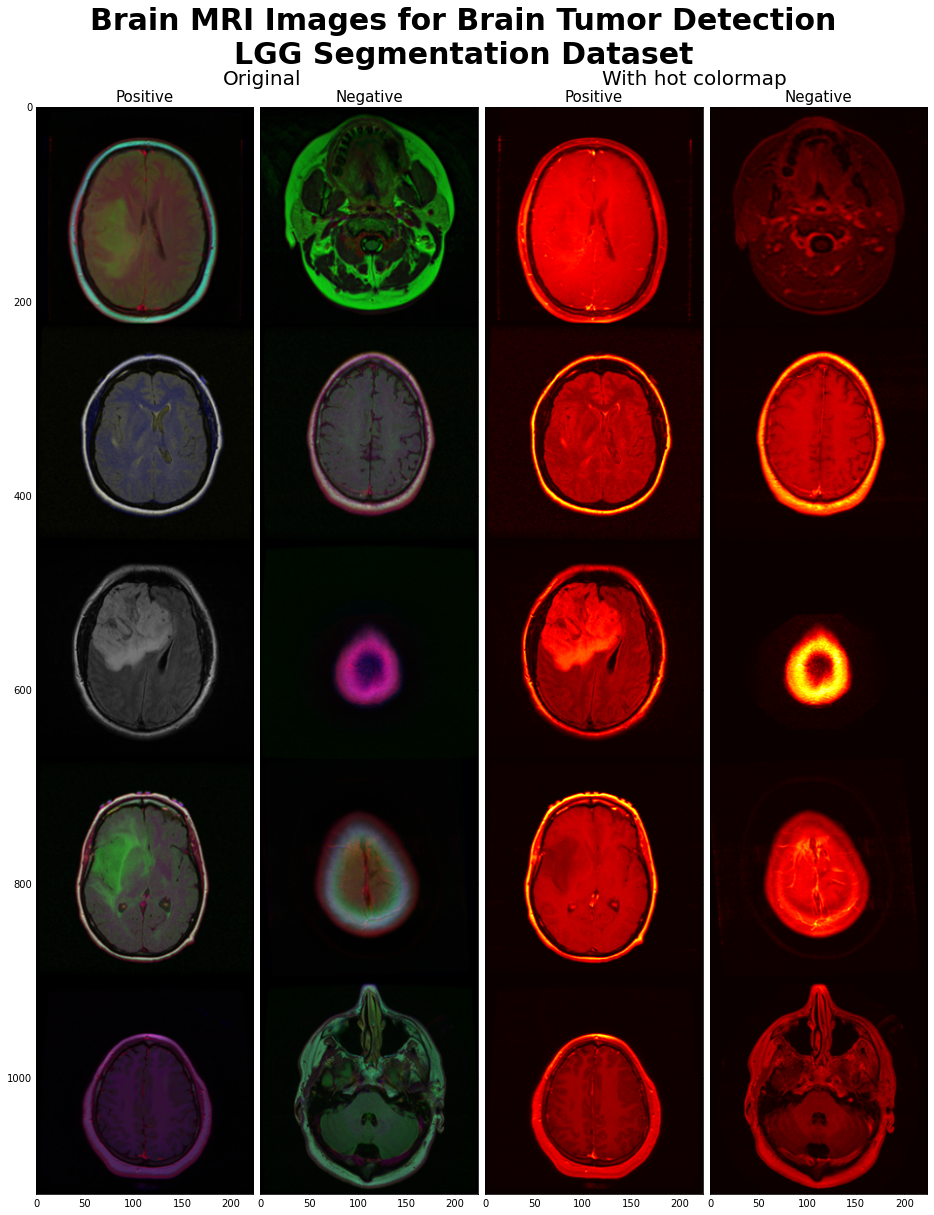

In [5]:
# Data
sample_yes_df = dataset[dataset["tumor"] == 1].sample(5).image_path.values
sample_no_df = dataset[dataset["tumor"] == 0].sample(5).image_path.values

sample_imgs = []
for i, (yes, no) in enumerate(zip(sample_yes_df, sample_no_df)):
    yes = cv2.resize(cv2.imread(yes), (IMG_SIZE, IMG_SIZE))
    no = cv2.resize(cv2.imread(no), (IMG_SIZE, IMG_SIZE))
    sample_imgs.extend([yes, no])


sample_yes_arr = np.vstack(np.array(sample_imgs[::2]))
sample_no_arr = np.vstack(np.array(sample_imgs[1::2]))

# Plot
fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(1, 4),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )


grid[0].imshow(sample_yes_arr)
grid[0].set_title("Positive", fontsize=15)
grid[0].axis("off")
grid[1].imshow(sample_no_arr)
grid[1].set_title("Negative", fontsize=15)
grid[1].axis("off")

grid[2].imshow(sample_yes_arr[:,:,0], cmap="hot")
grid[2].set_title("Positive", fontsize=15)
grid[2].axis("off")
grid[3].imshow(sample_no_arr[:,:,0], cmap="hot")
grid[3].set_title("Negative", fontsize=15)
grid[3].axis("off")#set_title("No", fontsize=15)

# annotations
plt.figtext(0.36,0.90,"Original", va="center", ha="center", size=20)
plt.figtext(0.66,0.90,"With hot colormap", va="center", ha="center", size=20)
plt.suptitle("Brain MRI Images for Brain Tumor Detection\nLGG Segmentation Dataset", y=.95, fontsize=30, weight="bold")

# save and show
plt.savefig("dataset.png", bbox_inches='tight', pad_inches=0.2, transparent=True)
plt.show()